# Klasyfikacja Irysów

Klasyfikowanie Irysów na podstawie zbioru *Iris* tekstowych danych Fishera to prawdopodobnie najbardziej klasyczne zadanie klasyfikacji. Poniżej przedstawię budowę prostego modelu klasyfikacji tego zbioru z pomocą modułu `Keras` zaimportowanego z biblioteki `TensorFlow 2`. Zdecydowałam się na zastosowanie zbioru *Iris*, `TensorFlow 2` i `Kerasa`, aby być jak najbliżej przedstawionych wymagań, pomimo iż półtora roku przygotowałam kilka projektów z Deep Learning z zastosowaniem biblioteki `PyTorch`, w ramach szkolenia przygotowanego przez portal edukacyjnemy *Udacity*.

Zacznę od zaimportowania niezbędnych bibliotek i modułów:

In [1]:
from tensorflow import keras as kr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Wprawdzie `TensorFlow` zawiera wbudowane dane *Iris* pochodzące z <a href="http://archive.ics.uci.edu/ml" target="_blank">UCI Machine Learning Repository</a>, jednak z kilku źródeł, np. z 
<a href="https://en.wikipedia.org/wiki/Iris_flower_data_set" target="_blank">Wikipedii</a>
wiadomo, że w repozytorium tym znajdują się dwa błędy. Dlatego dane *Iris* zaczerpnę z `scikit-learn`: 

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

Funkcja `load_iris` zwraca obiekt biblioteki `scikit-learn` typu <a href="https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html?highlight=bunch#sklearn.utils.Bunch" target="_blank">Bunch</a> rozszerzający znany z Pythona słownik. Pod jednym z kluczy, `DESC`, można w tym obiekcie tym znaleźć opis zbioru danych *Iris*, a w nim wzmiankę o wyżej wspominanym błędzie:

In [3]:
print(iris_dataset['DESCR'][1309:1425])

Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.


Interesujące mnie dane znajdują się pod kluczami `data` (to cztery cechy: długości i szerokości płatków i działek) oraz `target` (to etykiety, symbolizowane liczbami 0.0, 1.0, 2.0, odpowiadające, kolejno, nazwom gatunków: Setosa, Versicolor i Virginica.

In [4]:
iris_df = pd.DataFrame(data=np.c_[iris_dataset['data'], iris_dataset['target']],
                       columns=iris_dataset['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Żeby zwizualizować analizowane dane, przygotuję wykres ilustrujący długość (oś pozioma) i szerokość (oś pionowa) działki w podziale na gatunki:

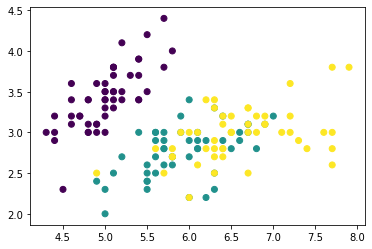

In [5]:
features = iris_dataset['data'].T
plt.scatter(features[0], features[1], c=iris_dataset['target'])
plt.show()

Przechodząc do budowy sieci neuronowej, zacznę od przygotowania danych w formacie gotowym do łatwego dzielenia na zbiór uczący `train` (o rozmiarze 105 rekordów) i zbiór testowy `test` (zawierający pozostałe rekordy):

In [6]:
iris_contatenated = np.concatenate((iris_dataset['data'], 
                                    kr.utils.to_categorical(iris_dataset['target'])), 
                                   axis=1)

In [7]:
test_size_proportion = 0.3

train, test = train_test_split(iris_contatenated, 
                               random_state=42, 
                               test_size=test_size_proportion)

In [8]:
inputs_train, outputs_categorical_train = train[:, :4], train[:, 4:7]
inputs_test, outputs_categorical_test = test[:, :4], test[:, 4:7]

Skonstruuję teraz dwuwarstwową sieć neuronową używając warstw, które są zawarte w `tensorflow.keras.layers`. Użyję dwóch warstw: pierwsza przekształci 4 cechy zbioru danych *Iris* w 16 neuronów, zaś druga dokona dalszego przekształcenia na kolejne 3 neurony, które posłużącą do identyfikacji poszczególnych gatunków:

In [9]:
model = kr.Sequential()
model.add(kr.layers.Dense(16, 
                          name='hidden_layer_1',
                          activation='sigmoid', 
                          input_shape=(4,)))
model.add(kr.layers.Dense(3, 
                          name='hidden_layer_2',
                          activation='softmax'))

model.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 16)                80        
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


Ustalę parametry modelu, a następnie wytrenuję go.

In [10]:
epochs = 100
training_size = 150*(1-test_size_proportion)
batch_size = 1
steps_per_epoch = np.ceil(training_size / batch_size)

model_training_history = model.fit(inputs_train,
                                   outputs_categorical_train, 
                                   epochs=epochs,
                                   steps_per_epoch=steps_per_epoch, 
                                   verbose=1)

Epoch 1/100
105/105 [==============================] - 1s 923us/step - loss: 1.2454 - accuracy: 0.4812
Epoch 2/100
105/105 [==============================] - 0s 852us/step - loss: 1.0728 - accuracy: 0.6738
Epoch 3/100
105/105 [==============================] - 0s 944us/step - loss: 1.0069 - accuracy: 0.7086
Epoch 4/100
105/105 [==============================] - 0s 893us/step - loss: 0.9825 - accuracy: 0.6569
Epoch 5/100
105/105 [==============================] - 0s 908us/step - loss: 0.9234 - accuracy: 0.7116
Epoch 6/100
105/105 [==============================] - 0s 938us/step - loss: 0.8902 - accuracy: 0.7035
Epoch 7/100
105/105 [==============================] - 0s 914us/step - loss: 0.8253 - accuracy: 0.8366
Epoch 8/100
105/105 [==============================] - 0s 902us/step - loss: 0.7767 - accuracy: 0.8429
Epoch 9/100
105/105 [==============================] - 0s 888us/step - loss: 0.7637 - accuracy: 0.7074
Epoch 10/100
105/105 [==============================] - 0s 865us/step - l

105/105 [==============================] - 0s 870us/step - loss: 0.1532 - accuracy: 0.9751
Epoch 81/100
105/105 [==============================] - 0s 1ms/step - loss: 0.1891 - accuracy: 0.9363
Epoch 82/100
105/105 [==============================] - 0s 829us/step - loss: 0.1183 - accuracy: 0.9879
Epoch 83/100
105/105 [==============================] - 0s 874us/step - loss: 0.1245 - accuracy: 0.9826
Epoch 84/100
105/105 [==============================] - 0s 806us/step - loss: 0.1499 - accuracy: 0.9541
Epoch 85/100
105/105 [==============================] - 0s 805us/step - loss: 0.1121 - accuracy: 0.9895
Epoch 86/100
105/105 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9866
Epoch 87/100
105/105 [==============================] - 0s 833us/step - loss: 0.1510 - accuracy: 0.9619
Epoch 88/100
105/105 [==============================] - 0s 852us/step - loss: 0.1410 - accuracy: 0.9705
Epoch 89/100
105/105 [==============================] - 0s 895us/step - loss: 0.0

W celu ocenienia jakości wytrenowanego modelu zwizualizuję krzywe uczenia: funkcję straty uczenia i dokładności uczenia:

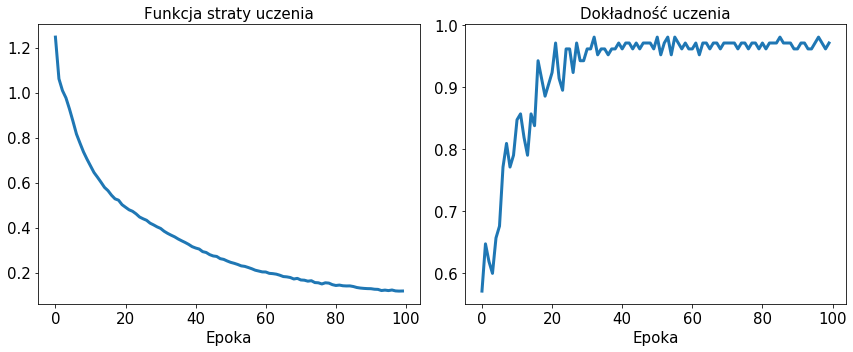

In [11]:
hist = model_training_history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Funkcja straty uczenia', size=15)
ax.set_xlabel('Epoka', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Dokładność uczenia', size=15)
ax.set_xlabel('Epoka', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

Powyższe wykresy wyglądają na poprawne, w szczególności nie wskazują na przetrenowanie modelu. 
<br>
Na zakończenie ocenię otrzymany model używając danych testowych.

In [12]:
results = model.evaluate(inputs_test, 
                         outputs_categorical_test, 
                         verbose=0)

print('Funkcja straty obliczona dla danych testowych: {:.4f} \nDokładność uczenia obliczona dla danych testowych: {:.4f}'.format(*results))

Funkcja straty obliczona dla danych testowych: 0.0804 
Dokładność uczenia obliczona dla danych testowych: 0.9778


Uzyskane powyżej wyniki dla danych testowych wskazują na to, że model dokonuje poprawnych projekcji etykiet. Aby zilustrować model sieci neuronowych, np. pokazać utworzoną przez sieć nieliniową granicę decyzyjną i jej przebieg na zbiorze uczącym, można w pewnych przypadkach używać funkcji `plot_decision_regions` z biblioteki `mlxtend`, ale to temat na inną historię...
<br><br>
Na zakończenie zapiszę zbudowany model. Formatem zapisu będzie HDF5 - format plików służących do przechowywania dużych zbiorów danych. Zapisany model umieszczę w repozytorium.

In [13]:
model.save('model-klasyfikacji-iris.h5', 
           overwrite=True,
           include_optimizer=True,
           save_format='h5')

### Literatura

S. Raschka, V. Mirjalili - Python. Machine learning i deep learning. Biblioteki scikit-learn i TensorFlow 2. Wydanie III
<br>
A. C. Müller, S. Guido - Introduction to Machine Learning with Python A Guide for Data Scientists 
<br>
P. Singh, A. Manure - Learn TensorFlow 2.0. Implement Machine Learning and Deep Learning Models with Python
